In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
filename ="/kaggle/input/salary-prediction/Salary_Data.csv"
df=pd.read_csv(filename)
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df.shape

(30, 2)

In [4]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [5]:
features=["YearsExperience"]
X=df[features]
y=df["Salary"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.7,random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [6]:
print(model.coef_)
print(model.intercept_)

[9252.99964662]
27957.90209282236


In [7]:
y_predict=model.predict(X_test)
mse=mean_squared_error(y_test,y_predict)
rscore=r2_score(y_test,y_predict)
print(mse)
print(rscore)

36156721.836254634
0.9529487725319487


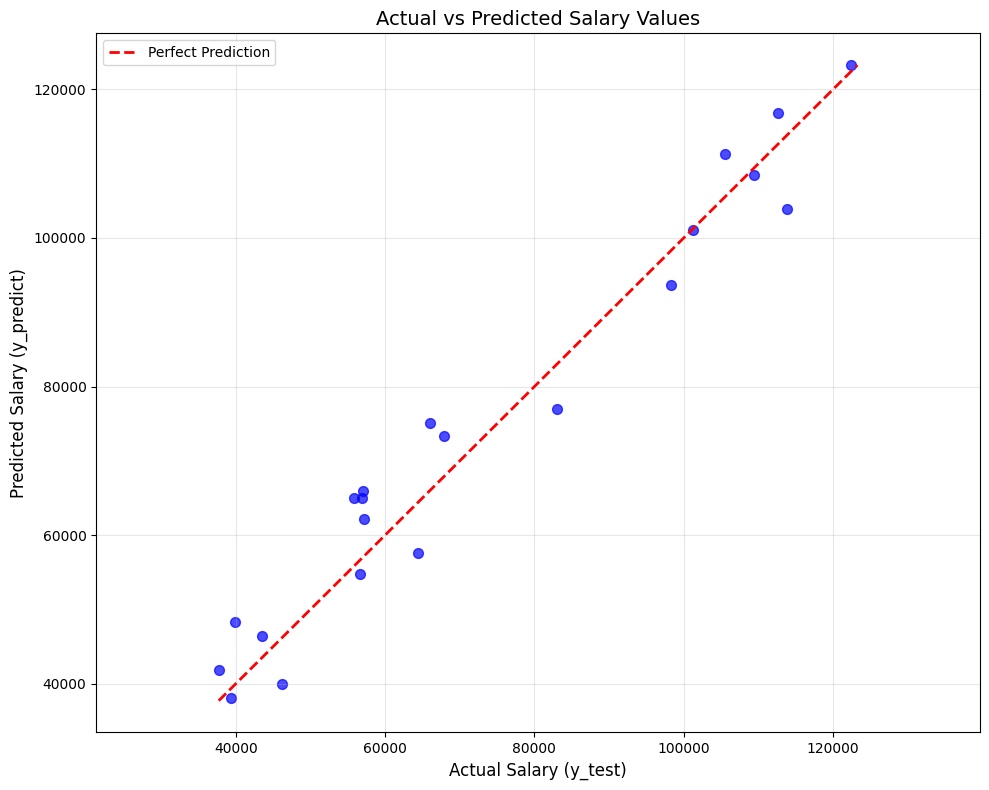

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Plot actual vs predicted values
plt.figure(figsize=(10, 8))

# Scatter plot of actual vs predicted
plt.scatter(y_test, y_predict, alpha=0.7, color='blue', s=50)

# Perfect prediction line (diagonal line)
min_val = min(min(y_test), min(y_predict))
max_val = max(max(y_test), max(y_predict))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')

# Labels and title
plt.xlabel('Actual Salary (y_test)', fontsize=12)
plt.ylabel('Predicted Salary (y_predict)', fontsize=12)
plt.title('Actual vs Predicted Salary Values', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# Make the plot square for better visualization
plt.axis('equal')
plt.tight_layout()
plt.show()

In [9]:
compare=pd.DataFrame({"actual": y_test[:5].values,"predicted": y_predict[:5]})
compare

,actual,predicted
0,112635.0,116786.698700
1,67938.0,73297.600361
2,113812.0,103832.499195
3,83088.0,76998.800220
4,64445.0,57567.500962
